In [1]:
%pip install opencv-python
%pip install numpy
%pip install pandas
# %pip uninstall tensorflow
%pip install tensorflow
%pip install matplotlib
%pip install keras-tuner
%python.exe -m pip install --upgrade pip

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/fb/c4/f574ba6f04e6d7bf8c38d23e7a52389566dd7631fee0bcdd79ea07ef2dbf/opencv_python-4.8.0.76-cp37-abi3-win_amd64.whl.metadata
  Obtaining dependency information for numpy>=1.21.2 from https://files.pythonhosted.org/packages/b7/db/4d37359e2c9cf8bf071c08b8a6f7374648a5ab2e76e2e22e3b808f81d507/numpy-1.25.2-cp310-cp310-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB 77.3 kB/s eta 0:08:12
   ---------------------------------------- 0.1/38.1 MB 196.9 kB/s e

ERROR: Exception:
Traceback (most recent call last):
  File "e:\BSc Project\Jupyter Code\venv\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "e:\BSc Project\Jupyter Code\venv\lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "e:\BSc Project\Jupyter Code\venv\lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "e:\BSc Project\Jupyter Code\venv\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\http\client.py", line 466, in read
    s = self.fp.read(amt)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\socket.py", line 705, in readinto
  


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/ba/7c/b971f2485155917ecdcebb210e021e36a6b65457394590be01cc61515310/tensorflow-2.13.0-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.13.0 from https://files.pythonhosted.org/packages/40/fa/98115f6fe4d92e1962f549917be2dc8e369853b7e404191996fedaaf4dd6/tensorflow_intel-2.13.0-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 0.0/126.5 kB ? eta -:--:--
     --- ------------------------------------ 10.2/126.5 kB ? eta -:--:--
     --- ------------------------------------ 10.2/126.5 kB ? eta -:--:--
     --- ------------------------------------ 10.2/126.5 kB ? eta -:--:--
     --- ------------------------------------ 10.2/126.5 kB ? eta -:--:--
     --------- ---------------------------- 30.7/126.5 kB 87.5 kB/s eta 0:00:02
     --------- ---------------------------- 30.7/126.5 kB 87.5 kB/s eta 0:00:02
     --------- -----

UsageError: Line magic function `%python.exe` not found.


In [3]:
%pip install scikit-learn

^C
Note: you may need to restart the kernel to use updated packages.


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/96/cf/a714a655266229b51eb2bda117f15275f12457887f165f3c1cc58ab502f1/scikit_learn-1.3.0-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/70/03/485f73046134400ea25d3cb178c5e6728f9b165f79d09638ecb44ee0e9b1/scipy-1.11.2-cp310-cp310-win_amd64.whl.metadata
  Using cached scipy-1.11.2-cp310-cp310-win_amd64.whl.metadata (59 kB)
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
  Using cached

In [43]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from collections import Counter
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import concurrent.futures
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Set the path to the dataset directory
dataset_dir = "DeepDRiD-master"

# Set the image size for resizing
image_size = (224, 224)


# Preprocessing parameters
clahe_clip_limit = 2.0
gaussian_kernel_size = (5, 5)
gaussian_sigma = 1.0

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the dataset
def preprocess_image(image_path):

    # print("Loading and preprocessing image:", image_path)

    # Load the image in grayscale
    image = cv2.imread(image_path)
    
    
    image = cv2.addWeighted(image,4, cv2.GaussianBlur(image, (0,0) , 10) ,-4 ,128)

    image = cv2.cvtColor(image)
    # clahe = cv2.createCLAHE(clipLimit=clahe_clip_limit)
    # image = clahe.apply(image)
    image = cv2.GaussianBlur(image, gaussian_kernel_size, gaussian_sigma)

    # Resize the image
    image = cv2.resize(image, image_size)

    # Apply CLAHE


    # Apply Gaussian blur

    min_val = np.min(image)
    max_val = np.max(image)
    # Normalize the image
    image = (image - min_val) / (max_val - min_val)

    # Expand dimensions to match expected input shape
    image = np.expand_dims(image, axis=-1)

    return image

def load_and_preprocess_image(image_info):
    image_path, label = image_info
    image = preprocess_image(image_path)
    return image, label

def convert_labels(labels):
    label_binarizer = LabelBinarizer()
    image_labels = label_binarizer.fit_transform(labels)
    count_classes = len(label_binarizer.classes_)
#     pickle.dump(label_binarizer, open('labels.pkl', 'wb'))
    
    return np.array(image_labels)
count0 = 0
# Load the dataset and preprocess the images
def load_dataset(dataset_path):
    def assign_label(label_type, row):
      
      label = None

      # Assign a label based on the patient DR level or any other relevant criteria
      if label_type == 0:
        label = np.zeros(5)
        if str(row['left_eye_DR_Level']) == 'nan':
          label[int(row['right_eye_DR_Level'])] = 1
        else:
          label[int(row['left_eye_DR_Level'])] = 1


      # Assign a label based on being sick or not
      elif label_type == 1:
        label = 0
        if str(row['left_eye_DR_Level']) == 'nan':
          label = 1 if int(row['right_eye_DR_Level']) > 0 else 0
        else:
          label = 1 if int(row['left_eye_DR_Level']) > 0 else 0

      elif label_type == 2:
        if str(row['left_eye_DR_Level']) == 'nan':
          label = int(row['right_eye_DR_Level'])
        else:
          label = int(row['left_eye_DR_Level']) 

      
      # Assign patient DR level as label
      elif label_type == 3:
        label = row['patient_DR_level']

      return label



    # Load the CSV file
    data = pd.read_csv(dataset_path)

    # Initialize empty lists for storing the images and labels
    images = []
    labels = []

    with concurrent.futures.ThreadPoolExecutor() as executor:
        image_infos = [(os.path.join(dataset_dir, "regular_fundus_images", row['image_path'][1:].replace('\\', '/')), assign_label(2, row)) for _, row in data.iterrows()]
        results = executor.map(load_and_preprocess_image, image_infos)

    for image, label in results:
        # if count0 > 120 and label == 0:
        #    continue
        # if label == 0:
        #    count0 +=0
        # if not 'validation' in dataset_path:
        #   if labels.count(0) >= 120 and label == 0:
        #     continue

        images.append(image)
        labels.append(1 if label > 0 else 0)
        
    return np.array(images), convert_labels(labels)


    # Iterate over each row in the CSV file
    for _, row in data.iterrows():
        # if str(row['left_eye_DR_Level']) == 'nan':
        #   continue
        # Load the image using the image path
        path = os.path.join(dataset_dir, "regular_fundus_images",row['image_path'][1:].replace('\\','/'))

        # Preprocess the image (e.g., resize, normalize, etc.)
        image = preprocess_image(path)

        # Append the preprocessed image to the list of images
        images.append(image)

        # Get the labels from the respective columns
        left_eye_dr_level = row['left_eye_DR_Level']
        right_eye_dr_level = row['right_eye_DR_Level']
        patient_dr_level = row['patient_DR_Level']



        label = assign_label(1)




        # Append the label to the list of labels
        labels.append(label)

        # Apply data augmentation to the image and label
        # for _ in range(1):  # Generate 3 augmented samples per original image
        #     augmented_image = datagen.random_transform(image)
        #     images.append(augmented_image)
        #     labels.append(label)

    # Return the images and labels as NumPy arrays
    return np.array(images), np.array(labels)


# Load the training and validation datasets
train_images, train_labels = load_dataset(os.path.join(dataset_dir, "regular_fundus_images", "regular-fundus-training","regular-fundus-training.csv"))
val_images, val_labels = load_dataset(os.path.join(dataset_dir, "regular_fundus_images", "regular-fundus-validation","regular-fundus-validation.csv"))

print(f"Loaded total {len(train_images)} training images with {len(train_labels)} labels\nLoaded total {len(val_images)} validation images with {len(val_labels)} labels")
print(train_images.shape)




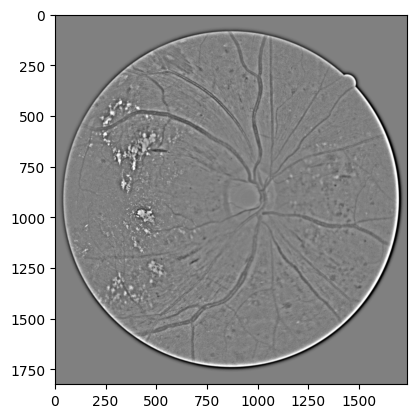

In [13]:
import cv2
import matplotlib.pyplot  as plt
# Load the image in grayscale
image = cv2.imread('retino.jpg')

clahe_clip_limit = 2.0
gaussian_kernel_size = (5, 5)
gaussian_sigma = 1.0


image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=clahe_clip_limit)
clahe_image = clahe.apply(image)
clahe_image = cv2.addWeighted(image,4, cv2.GaussianBlur(image, (0,0) , 10) ,-4 ,128)

# image = cv2.GaussianBlur(image, gaussian_kernel_size, gaussian_sigma)
plt.imshow(clahe_image, cmap='gray')

# plt.subplot(2,2,1),plt.imshow(image,cmap='gray')
# plt.title('a) Original'), plt.xticks([]), plt.yticks([])

# plt.subplot(2,2,2),plt.imshow(clahe_image,cmap='gray')
# plt.title('b) CLAHE'), plt.xticks([]), plt.yticks([])

# plt.show()

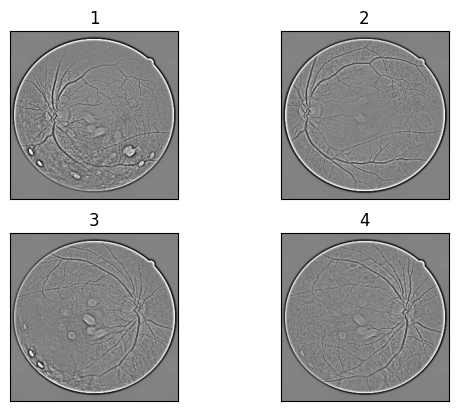

In [24]:
for i in range(4):
  plt.subplot(2,2,i+1),plt.imshow(train_images[i],cmap = 'gray')
  plt.title(i+1), plt.xticks([]), plt.yticks([])

plt.show()

In [19]:

# Create a dataset for training images and labels
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))

# Create a dataset for validation images and labels
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))

# Optionally shuffle and batch the datasets
batch_size = 32
train_dataset = train_dataset.shuffle(len(train_images)).batch(batch_size)
val_dataset = val_dataset.batch(batch_size)



In [25]:
# Define a function to apply data augmentation to a single image and label
def augment_data(image, label):
    augmented_image = datagen.random_transform(image)
    return augmented_image, label

# Apply data augmentation to the training dataset
# train_dataset_augmented = train_dataset.map(augment_data)


In [9]:
import tensorflow as tf



# train_convolve =  np.mean(train_convolve, axis=-1, keepdims=True)
# val_convolve = np.mean(val_convolve, axis=-1, keepdims=True)

print(train_images.shape)
print(val_images.shape)
# Resize your retina images to match the input size expected by VGG16
# resized_train_images = tf.image.resize(train_images, (224, 224))
# resized_val_images = tf.image.resize(val_images, (224, 224))
# Convert grayscale images to RGB by repeating the single channel
# rgb_train_images = tf.repeat(resized_train_images, 3, axis=-1)
# rgb_val_images = tf.repeat(resized_val_images, 3, axis=-1)
# print(resized_train_images.shape)
# print(resized_val_images.shape)
# del resized_train_images
# del resized_val_images
# del train_convolve
# del val_convolve


from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.applications import VGG16, DenseNet121, InceptionV3, InceptionResNetV2, ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.models import Model

# Load the pre-trained VGG16 model (exclude top fully connected layers)
dense_net_weights_file_path = 'densenet121_weights_tf_dim_ordering_tf_kernels_notop.h5'
vgg_weights = 'imagenet'
base_model = VGG16(weights=vgg_weights, include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional base (make it non-trainable)
for layer in base_model.layers:
    layer.trainable = False
    
print(base_model.output.shape)
x = tf.keras.layers.Conv2D(128,kernel_size=(1,1),padding='SAME',activation='relu')(base_model.output)
x = tf.keras.layers.BatchNormalization(axis=-1)(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Dropout(0.25)(x)
# Add your custom classification head
# x = GlobalAveragePooling2D()(base_model.output)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)  # You can customize the architecture here
x = Dropout(0.5)(x)
predictions = Dense(5, activation='softmax')(x)  # Binary classification


# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
optimizer = Adam(learning_rate=0.01)  # Adjust the learning rate
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train your model with your retina images and binary labels
history = model.fit(train_images, train_labels, epochs=30, batch_size=128, validation_data=(val_images, val_labels))


(780, 256, 256)
(400, 256, 256)
(None, 7, 7, 512)
Epoch 1/30


ValueError: in user code:

    File "e:\BSc Project\Jupyter Code\venv\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "e:\BSc Project\Jupyter Code\venv\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "e:\BSc Project\Jupyter Code\venv\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "e:\BSc Project\Jupyter Code\venv\lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "e:\BSc Project\Jupyter Code\venv\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "e:\BSc Project\Jupyter Code\venv\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_3" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 256, 256)


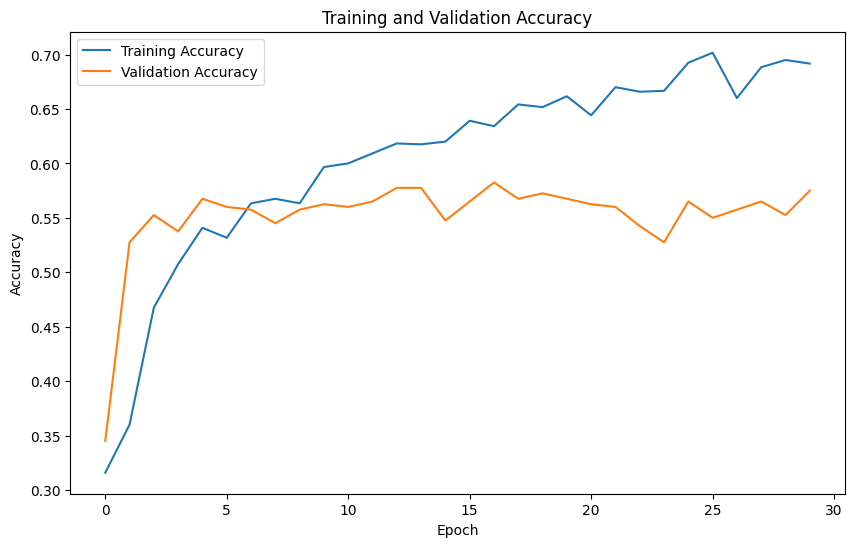

In [7]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
# accuracy = [0.6333, 0.6758 ,0.7200 ,0.7192,0.7575 ,0.7408 ,0.7483,0.7517,0.7558  , 0.7683 ]
# val_accuracy = [0.6750,0.6775,0.6700,0.7000,0.7075,0.7150,0.7300,0.7150,0.7125,0.7325]
plt.figure(figsize=(10, 6))
plt.plot(history.history["accuracy"], label='Training Accuracy')
plt.plot(history.history["val_accuracy"], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

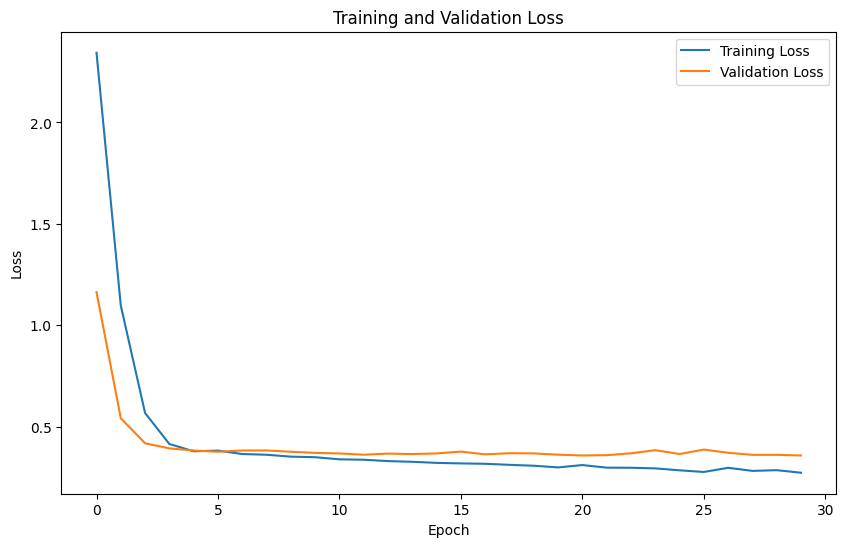

In [8]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
# accuracy = [0.6333, 0.6758 ,0.7200 ,0.7192,0.7575 ,0.7408 ,0.7483,0.7517,0.7558  , 0.7683 ]
# val_accuracy = [0.6750,0.6775,0.6700,0.7000,0.7075,0.7150,0.7300,0.7150,0.7125,0.7325]
plt.figure(figsize=(10, 6))
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history["val_loss"], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [15]:
def find_initial_patterns(images):
    batch_size, height, width, channels = images.shape
    kernel_count = {}
    filter_count = 12
    kernel_size = (3, 3)
    
    for b in range(batch_size):
        for i in range(height - kernel_size[0] + 1):
            for j in range(width - kernel_size[1] + 1):
                kernel = images[b, i:i+kernel_size[0], j:j+kernel_size[1]]

                # find the index of the three highest values
                top_values_index = np.argpartition(kernel.flatten(), -3)[-3:]

                # Create a binary mask where the highest values are set to 1
                mask = np.zeros_like(kernel.flatten())
                mask[top_values_index] = 1

                # Count the occurrence of the same patterns
                kernel_key = tuple(mask)
                if kernel_key in kernel_count:
                    kernel_count[kernel_key] += 1
                else:
                    kernel_count[kernel_key] = 1

    # Group the patterns
    grouped_kernels = {}
    for kernel_key, count in kernel_count.items():
        if count > 10000:
            if count in grouped_kernels:
                grouped_kernels[count].append(kernel_key)
            else:
                grouped_kernels[count] = [kernel_key]

    # find patterns
    totoal = 0
    max_count = [0 for x in range(12)]
    # Print the grouped kernels
    for count, kernels in grouped_kernels.items():
        min_of_max_count = min(max_count)
        pos_of_min = max_count.index(min_of_max_count)
        if min_of_max_count < count :
            max_count[pos_of_min] = count
        print(f"Kernels with occurrence {count}:")
        for kernel in kernels:
            totoal += count
            print(kernel)
    print()
    max_count_pattern = []
    for c1 in (max_count):
        max_count_pattern.append(grouped_kernels[c1][0])
        print(grouped_kernels[c1][0])
    return max_count_pattern

In [16]:
def all_initial_patterns(images, dtype='float32', shape=(3, 3)):
    patterns = []
    # add special patterns
    laplacian = tf.constant([[1, 1, 1], [1, -8, 1], [1, 1, 1]], dtype=dtype, shape=shape)
    sobel_x = tf.constant([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=dtype, shape=shape)
    sobel_y = tf.constant([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=dtype, shape=shape)
    diagonal_edge_detection = tf.constant([[0, -1, -1], [1, 0, -1], [1, 1, 0]],dtype=dtype, shape=shape)
    patterns.extend([laplacian, sobel_x, sobel_y, diagonal_edge_detection])
    # add custom patterns
    custom_patterns = find_initial_patterns(images)
    for cu in custom_patterns:
        patterns.append(tf.constant(list(cu), dtype=dtype, shape=shape))
        
    return patterns

# Define the initial kernels
initial_patterns = all_initial_patterns(train_images)
initial_shape = (3,3,1,len(initial_patterns))
initial_kernel_size = (initial_shape[0],initial_shape[1])
shape = initial_shape
kernel_size = initial_kernel_size
patterns = initial_patterns
n_patterns = len(patterns)


Kernels with occurrence 17839546:
(0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0)
Kernels with occurrence 2552556:
(0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0)
Kernels with occurrence 1056516:
(0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0)
Kernels with occurrence 2281705:
(1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0)
Kernels with occurrence 1568722:
(0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0)
Kernels with occurrence 2624006:
(1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
Kernels with occurrence 638037:
(1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0)
Kernels with occurrence 719620:
(1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0)
Kernels with occurrence 720331:
(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0)
Kernels with occurrence 2456886:
(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0)
Kernels with occurrence 749076:
(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0)
Kernels with occurrence 745650:
(0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0)
Kernels with occurrence 658584:
(0.0, 0.0, 0.0, 0.0, 0.0

In [27]:

def extract_new_patterns(images):
    # Initializing paremeters for kernels extraction
    kernels = {}
    batch_size, image_height, image_width, channels = images.shape


    # Kernels extraction process
    for i in range(batch_size):
        for row in range(image_height):
            for col in range(image_width):
                # Extract the values for the current pixel across channels
                values = images[i, row, col]

                # Find the indices of the three maximum values
                max_indices = np.argpartition(values, -3)[-3:]

                # Create a kernel with all zeros
                kernel = np.zeros((1, 1, channels))

                # Set the max value indices in the kernel to 1
                kernel[0, 0, max_indices] = 1

                # Convert the kernel to a hashable string for dictionary key
                kernel_key = str(kernel)

                # Check if the kernel already exists in the dictionary
                if kernel_key in kernels:
                    kernels[kernel_key]['count'] += 1
                else:
                    kernels[kernel_key] = {
                        'kernel': kernel,
                        'count': 1
                    }

    # Remove kernels with count below 30
    kernels = [value['kernel']
                for key, value in kernels.items() if value['count'] >= threshold]

    # Reshape the remaining kernels
    output_channel = len(kernels)
    kernel_height, kernel_width, _ = kernel.shape
    kernels = np.array(kernels).reshape(
        kernel_height, kernel_width, channels, output_channel)

    return kernels


In [6]:
import multiprocessing
threshold = 0

def get_all_patterns(patterns):
  try:
    patterns_shape = patterns.shape
  except:
    patterns_shape = initial_shape
  def initializer(shape, dtype='float32'):
    return tf.constant(np.array(patterns).T, shape=patterns_shape, dtype=dtype)

  return initializer


# # Reducing the size of input_images for test
# train_images = train_images[-10:]





def apply_patterns(input_images,patterns):

    # Calculating parameters
    if isinstance(patterns,list):
        n_patterns = len(patterns)
        kernel_size = initial_kernel_size
    else:
        kernel_size = (patterns.shape[0], patterns.shape[1])
        n_patterns = patterns.shape[3]


    print("n_patterns", n_patterns)
    print("input_images shape", input_images.shape)
    # Apply convolution
    conv_output = tf.keras.layers.Conv2D(n_patterns, kernel_size=kernel_size,
                                         kernel_initializer=get_all_patterns(patterns), padding='SAME',activation='relu')(input_images)

    batch_normalization_output = tf.keras.layers.BatchNormalization(axis=-1)(conv_output)
    # Apply maxpool to reduce the size
    maxpool_output = tf.keras.layers.MaxPool2D()(batch_normalization_output)
    print("Output shape: ", maxpool_output.shape)
    return maxpool_output

def find_three_max_values(pixel):
  """Finds the three largest values in a pixel and returns them as a list."""
  max_values = np.argsort(pixel)[-3:]
  return list(max_values)

def process_image(image):
    channels = image.shape[-1]
    kernel_count = {}

    for pixel in image.numpy().reshape(-1, channels):
        three_max_values = list(np.argsort(pixel)[-3:])
        kernel = np.zeros((1, 1, channels), dtype=np.float32)
        kernel[0, 0, three_max_values] = 1

        kernel_str = str(kernel)

        if kernel_str in kernel_count:
            kernel_count[kernel_str]['count'] += 1
        else:
            kernel_count[kernel_str] = {'kernel': kernel, 'count': 1}

    return kernel_count

def extract_new_patterns2(images,threshold, just_one=False):
  try:
    kernel_count = {}
    batch_size, image_height, image_width, channels = images.shape

    # for image in images:
    #   for pixel in image.numpy().reshape(-1, channels):
    #     three_max_values = list(np.argsort(pixel)[-3:])
    #     kernel = np.zeros((1,1,channels), dtype = np.float32)
    #     kernel[0,0,three_max_values] = 1

    #     if str(kernel) in kernel_count: kernel_count[str(kernel)]['count'] += 1
    #     else: kernel_count[str(kernel)] = {'kernel':kernel, 'count': 1}
    # Assuming you have a list of images called 'images'
    num_processes = multiprocessing.cpu_count()  # Use the number of CPU cores available
    pool = multiprocessing.Pool(processes=num_processes)

    # Split the images into chunks to be processed by different processes
    chunk_size = len(images) // num_processes
    image_chunks = [images[i:i + chunk_size] for i in range(0, len(images), chunk_size)]

    results = pool.map(process_image, image_chunks)

    # Merge the results from different processes
    final_kernel_count = {}
    for result in results:
        for kernel_str, data in result.items():
            if kernel_str in final_kernel_count:
                final_kernel_count[kernel_str]['count'] += data['count']
            else:
                final_kernel_count[kernel_str] = data
                
    kernels_with_high_occurrence = [value['kernel'] for key, value in final_kernel_count.items() if value['count'] >= threshold]

    # Extracting only one pattern if it is the last layer
    if just_one and len(kernels_with_high_occurrence) > 1:
      kernels_with_high_occurrence = kernels_with_high_occurrence[-1]

    kernel_height, kernel_width, _ = kernel.shape
    kernels_with_high_occurrence = np.array(kernels_with_high_occurrence).reshape(kernel_height, kernel_width, channels, len(kernels_with_high_occurrence))
    print("Patterns shape:", kernels_with_high_occurrence.shape)
    return kernels_with_high_occurrence
  except Exception as e:
    raise e

def extract_new_patterns3(images):
    # Initializing paremeters for kernels extraction
    kernels = {}
    batch_size, image_height, image_width, channels = images.shape


    # Kernels extraction process
    kernels_with_high_occurrence = []
    for image in images:
        kernel = np.zeros((1, 1, channels), dtype=np.int8)
        three_max_values = np.argsort(image.numpy().reshape(-1, channels))[-3:]
        kernel[0, 0, three_max_values] = 1

        if str(kernel) not in kernels:
            kernels[str(kernel)] = {'kernel': kernel, 'count': 1}
        else:
            kernels[str(kernel)]['count'] += 1


    print(kernels)
    for key, value in kernels.items():
        if value['count'] >= threshold:
            kernels_with_high_occurrence.append(value['kernel'])

    kernel_height, kernel_width, _ = kernel.shape
    kernels_with_high_occurrence = np.array(kernels_with_high_occurrence).reshape(
        kernel_height, kernel_width, channels, len(kernels_with_high_occurrence))

    return kernels_with_high_occurrence








def train_model(train_images,num_layers,patterns):

    previous_layer = train_images
    last_layer = None
    last_layers = []
    for _ in range(num_layers):

        layer = apply_patterns(previous_layer,patterns)
        print(f"layer {_ + 1} shape {layer.shape}")
        just_one = False
        if _ != num_layers - 1:
          # if _ == num_layers - 2:
          #   just_one = True
          patterns = extract_new_patterns2(layer,_)
          print(f"layer {_ + 1} patterns shape {patterns.shape}\n")
        previous_layer = layer
        last_layer = layer



        if patterns.shape[3] == 0:
          break


    # flatten_layer = tf.keras.layers.Flatten()(last_layer)


    # last_layers.append(last_dense_layer)

    return last_layer


In [29]:
from tensorflow.keras import backend as K
# Get the shape of the train_images
# K.clear_session()
input_shape = train_images.shape[1:]
threshold = [12000,500,500]
num_layers = 3
print('Threshold:',threshold,'\nLayers Number:',num_layers)
# train_images = train_images[-10:]
# val_images = val_images[-10:]
# train_labels = train_labels[-10:]
# val_labels = val_labels[-10:]


Threshold: [12000, 500, 500] 
Layers Number: 3


In [85]:


# Track overfitting
train_precision = []
val_precision = []

train_loss = []
val_loss = []

train_accuracy = []
val_accuracy = []

# Train the model
print("Train phase")
train_convolve = train_model(train_images,num_layers,initial_patterns)

print("Train Convolve Shape", train_convolve.shape)

print("\nValidation phase")
val_convolve = train_model(val_images,num_layers,initial_patterns)

print("Validation Convolve Shape", val_convolve.shape)
# del patterns


Train phase
n_patterns 16
input_images shape (1200, 256, 256, 1)
layer 1 shape (1200, 128, 128, 16)
layer 1 patterns shape (1, 1, 16, 62)

n_patterns 62
input_images shape (1200, 128, 128, 16)
layer 2 shape (1200, 64, 64, 62)
layer 2 patterns shape (1, 1, 62, 18)

n_patterns 18
input_images shape (1200, 64, 64, 62)
layer 3 shape (1200, 32, 32, 18)
Train Convolve Shape (1200, 32, 32, 18)

Validation phase
n_patterns 16
input_images shape (400, 256, 256, 1)
layer 1 shape (400, 128, 128, 16)
layer 1 patterns shape (1, 1, 16, 40)

n_patterns 40
input_images shape (400, 128, 128, 16)
layer 2 shape (400, 64, 64, 40)
layer 2 patterns shape (1, 1, 40, 26)

n_patterns 26
input_images shape (400, 64, 64, 40)
layer 3 shape (400, 32, 32, 26)
Validation Convolve Shape (400, 32, 32, 26)


In [30]:
threshold = [12000,500,500]

layer1 = apply_patterns(train_images,initial_patterns)
patterns1 = extract_new_patterns2(layer1,threshold[0])

layer2 = apply_patterns(layer1, patterns1)
patterns2 = extract_new_patterns2(layer2, threshold[1])

# layer3 = apply_patterns(layer2, patterns2)
# patterns3 = extract_new_patterns2(layer3,threshold[2])

n_patterns 16
input_images shape (1200, 256, 256, 1)
Output shape:  (1200, 128, 128, 16)


In [1]:
import json, codecs

def save_patterns(patterns, layer_num):
    with open("patterns_layer{0}.json".format(layer_num), 'w') as file:
        json.dump(patterns, file, ensure_ascii=False)
        
def load_patterns(layer_num):
    file_path = "patterns_layer{0}.json".format(layer_num)
    file = codecs.open(file_path, 'r').read()
    pattern = json.loads(file)
    return np.array(pattern)

In [24]:
save_patterns(np.array(initial_patterns).tolist(),0)
save_patterns(patterns1.tolist(), 1)
save_patterns(patterns2.tolist(), 2)

In [18]:
# initial_patterns = load_patterns(0)
patterns1 = load_patterns(1)
patterns2 = load_patterns(2)
print(initial_patterns.shape)
print(get_all_patterns(initial_patterns)((3,3)).shape)

AttributeError: 'list' object has no attribute 'shape'

In [39]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import tensorflow_hub as hub

# URL for the MobileNetV2 model on TensorFlow Hub
mobile_net_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

def cnn_model_with_transfer_learning(images, layer1_p, layer2_p, layer3_p, labels, units=1024, num_classes=5):
    # Load the pre-trained VGG16 model (excluding the top fully connected layers)
    # base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model = hub.KerasLayer(mobile_net_url, input_shape=(224, 224, 3))

    # for layer in base_model.layers:
    #     layer.trainable = False

    model = Sequential()

    model.add(base_model)


    # # Add your custom layers on top of the convolutional base
    # model.add(Conv2D(len(layer1_p), kernel_size=(3, 3), kernel_initializer=get_all_patterns(layer1_p), padding='SAME', activation='relu'))
    # model.add(BatchNormalization(axis=-1))
    # model.add(MaxPooling2D())

    # model.add(Conv2D(layer2_p.shape[3], kernel_size=(layer2_p.shape[0], layer2_p.shape[1]), kernel_initializer=get_all_patterns(layer2_p), padding='SAME', activation='relu'))
    # model.add(BatchNormalization(axis=-1))
    # model.add(MaxPooling2D())

    # model.add(Conv2D(layer3_p.shape[3], kernel_size=(layer3_p.shape[0], layer3_p.shape[1]), kernel_initializer=get_all_patterns(layer3_p), padding='SAME', activation='relu'))
    # model.add(BatchNormalization(axis=-1))
    # model.add(MaxPooling2D())
    # # You mentioned that you want to use the output in (32, 32, 18) shape,
    # # so you might need to adjust the layers accordingly.
    
    # # Add custom layers here, e.g., additional Conv2D, Flatten, and Dense layers
    # model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    # model.add(BatchNormalization(axis=-1))
    # model.add(MaxPooling2D())
    
    # model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    # model.add(BatchNormalization(axis=-1))
    # model.add(MaxPooling2D())

    # model.add(tf.keras.layers.Reshape((224,224,3)))
    
    # Add the pre-trained convolutional base
    # model.add(base_model)

    # model.add(GlobalAveragePooling2D())
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))

    # Output layer with the number of classes
    model.add(Dense(1, activation='sigmoid'))



    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [40]:
transfer_model = cnn_model_with_transfer_learning(train_images,initial_patterns,patterns1,patterns2,train_labels)

In [42]:
history = transfer_model.fit(train_images, train_labels, epochs=30, batch_size=32, validation_data=(val_images, val_labels))


Epoch 1/30


ValueError: in user code:

    File "e:\BSc Project\Jupyter Code\venv\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "e:\BSc Project\Jupyter Code\venv\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "e:\BSc Project\Jupyter Code\venv\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "e:\BSc Project\Jupyter Code\venv\lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "e:\BSc Project\Jupyter Code\venv\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "e:\BSc Project\Jupyter Code\venv\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_5" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 256, 256, 1)


In [17]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout

def cnn_model(images, layer1_p, layer2_p, layer3_p, labels, units=1024):
    model = Sequential()
    _ , height, width, channels = images.shape
    count_classes = len(labels[0])
    
    model.add(Conv2D(len(layer1_p), kernel_size=(3, 3),
                     kernel_initializer=get_all_patterns(layer1_p), padding='SAME', activation='relu'))
    model.add(BatchNormalization(axis=-1))
    
    model.add(MaxPooling2D())
    
    model.add(Conv2D(layer2_p.shape[3], kernel_size=(layer2_p.shape[0], layer2_p.shape[1]),
                     kernel_initializer=get_all_patterns(layer2_p), padding='SAME', activation='relu'))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D())
    
    model.add(Conv2D(layer3_p.shape[3], kernel_size=(layer3_p.shape[0], layer3_p.shape[1]),
                     kernel_initializer=get_all_patterns(layer3_p), padding='SAME', activation='relu'))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D())
    
    model.add(Flatten())
    
    model.add(Dense(units,activation='relu')) # number of dense unit
    model.add(Dropout(0.5))
    print("count_classes: ", count_classes)
    model.add(Dense(count_classes, activation='softmax')) # with labels
    
    return model

In [15]:
new_model = cnn_model(train_images, initial_patterns, patterns1, patterns2, train_labels)

count_classes:  5


In [17]:
# history = compile_model(new_model, train_images, y_tr, x_te, y_te)
optimizer = Adam(learning_rate=0.05)
new_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = new_model.fit(train_images, train_labels, epochs=30, batch_size=128, validation_data=(val_images, val_labels))

Epoch 1/30


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_2/conv2d_1/Relu' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "e:\BSc Project\Jupyter Code\.venv\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "e:\BSc Project\Jupyter Code\.venv\Lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "e:\BSc Project\Jupyter Code\.venv\Lib\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "e:\BSc Project\Jupyter Code\.venv\Lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.1008.0_x64__qbz5n2kfra8p0\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.1008.0_x64__qbz5n2kfra8p0\Lib\asyncio\base_events.py", line 1922, in _run_once
      handle._run()
    File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.1008.0_x64__qbz5n2kfra8p0\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "e:\BSc Project\Jupyter Code\.venv\Lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "e:\BSc Project\Jupyter Code\.venv\Lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "e:\BSc Project\Jupyter Code\.venv\Lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "e:\BSc Project\Jupyter Code\.venv\Lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "e:\BSc Project\Jupyter Code\.venv\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "e:\BSc Project\Jupyter Code\.venv\Lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "e:\BSc Project\Jupyter Code\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "e:\BSc Project\Jupyter Code\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "e:\BSc Project\Jupyter Code\.venv\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "e:\BSc Project\Jupyter Code\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "e:\BSc Project\Jupyter Code\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "e:\BSc Project\Jupyter Code\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\NoteBook\AppData\Local\Temp\ipykernel_17524\2516565406.py", line 4, in <module>
      history = new_model.fit(train_images, train_labels, epochs=30, batch_size=128, validation_data=(val_images, val_labels))
    File "e:\BSc Project\Jupyter Code\.venv\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "e:\BSc Project\Jupyter Code\.venv\Lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "e:\BSc Project\Jupyter Code\.venv\Lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "e:\BSc Project\Jupyter Code\.venv\Lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "e:\BSc Project\Jupyter Code\.venv\Lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "e:\BSc Project\Jupyter Code\.venv\Lib\site-packages\keras\engine\training.py", line 1050, in train_step
      y_pred = self(x, training=True)
    File "e:\BSc Project\Jupyter Code\.venv\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "e:\BSc Project\Jupyter Code\.venv\Lib\site-packages\keras\engine\training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "e:\BSc Project\Jupyter Code\.venv\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "e:\BSc Project\Jupyter Code\.venv\Lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "e:\BSc Project\Jupyter Code\.venv\Lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "e:\BSc Project\Jupyter Code\.venv\Lib\site-packages\keras\engine\sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "e:\BSc Project\Jupyter Code\.venv\Lib\site-packages\keras\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "e:\BSc Project\Jupyter Code\.venv\Lib\site-packages\keras\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "e:\BSc Project\Jupyter Code\.venv\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "e:\BSc Project\Jupyter Code\.venv\Lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "e:\BSc Project\Jupyter Code\.venv\Lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "e:\BSc Project\Jupyter Code\.venv\Lib\site-packages\keras\layers\convolutional\base_conv.py", line 321, in call
      return self.activation(outputs)
    File "e:\BSc Project\Jupyter Code\.venv\Lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "e:\BSc Project\Jupyter Code\.venv\Lib\site-packages\keras\backend.py", line 5396, in relu
      x = tf.nn.relu(x)
Node: 'sequential_2/conv2d_1/Relu'
convolution filter must be 4-dimensional: [16,3,3]
	 [[{{node sequential_2/conv2d_1/Relu}}]] [Op:__inference_train_function_5442]

In [16]:
def data_AUG():
    dataAugmentation = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1,
                                         shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
    return dataAugmentation

In [18]:
from tensorflow.keras.optimizers import Adam, SGD

def compile_model(model, x_tr, y_tr, x_te, y_te, optimizer_func='adam', LR=1e-2):
    EPOCHS = 25
    STEPS = 100
#     LR = 1e-3
    BATCH_SIZE = 40
#     _ , HEIGHT, WIDTH, CHANNELS = images.shape
    
    if optimizer_func == 'adam':
        optimizer = Adam(learning_rate=LR, weight_decay= LR / EPOCHS)
    else:
        optimizer = SGD(learning_rate=LR)
    
    
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=["accuracy"])
    
    data_aug = data_AUG()
    
    history = model.fit_generator(data_aug.flow(x_tr, y_tr, batch_size= BATCH_SIZE),
                                  validation_data=(x_te, y_te),
                                  steps_per_epoch= len(x_tr) // BATCH_SIZE,
                                  epochs = EPOCHS , verbose = 1)
    
    return history

In [50]:
import tensorflow as tf



# train_convolve =  np.mean(train_convolve, axis=-1, keepdims=True)
# val_convolve = np.mean(val_convolve, axis=-1, keepdims=True)

print(train_convolve.shape)
print(val_convolve.shape)
# Resize your retina images to match the input size expected by VGG16
resized_train_images = tf.image.resize(train_images, (224, 224))
resized_val_images = tf.image.resize(val_images, (224, 224))
# Convert grayscale images to RGB by repeating the single channel
rgb_train_images = tf.repeat(resized_train_images, 3, axis=-1)
rgb_val_images = tf.repeat(resized_val_images, 3, axis=-1)

# del resized_train_images
# del resized_val_images
# del train_convolve
# del val_convolve



(1200, 8, 8, 1)
(400, 8, 8, 1)


In [51]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16, DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.models import Model
# Load the pre-trained VGG16 model (exclude top fully connected layers)
dense_net_weights_file_path = 'densenet121_weights_tf_dim_ordering_tf_kernels_notop.h5'
vgg_weights = 'imagenet'
base_model = VGG16(weights=vgg_weights, include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional base (make it non-trainable)
for layer in base_model.layers:
    layer.trainable = False


# Add your custom classification head
x = GlobalAveragePooling2D()(base_model.output)
x = Flatten()(x)
x = Dense(256, activation='linear')(x)  # You can customize the architecture here
# x = Dropout(0.2)(x)
predictions = Dense(5, activation='softmax')(x)  # Binary classification


# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
optimizer = Adam(learning_rate=0.0001)  # Adjust the learning rate
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train your model with your retina images and binary labels
history = model.fit(rgb_train_images, train_labels, epochs=30, batch_size=128, validation_data=(rgb_val_images, val_labels))


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 0.5250 - accuracy: 0.3667 

KeyboardInterrupt: 

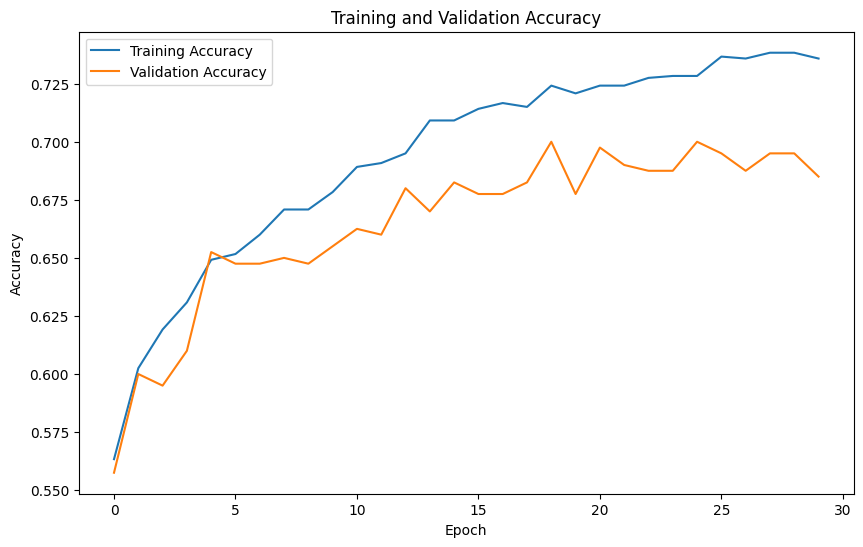

In [14]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
# accuracy = [0.6333, 0.6758 ,0.7200 ,0.7192,0.7575 ,0.7408 ,0.7483,0.7517,0.7558  , 0.7683 ]
# val_accuracy = [0.6750,0.6775,0.6700,0.7000,0.7075,0.7150,0.7300,0.7150,0.7125,0.7325]
plt.figure(figsize=(10, 6))
plt.plot(history.history["accuracy"], label='Training Accuracy')
plt.plot(history.history["val_accuracy"], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

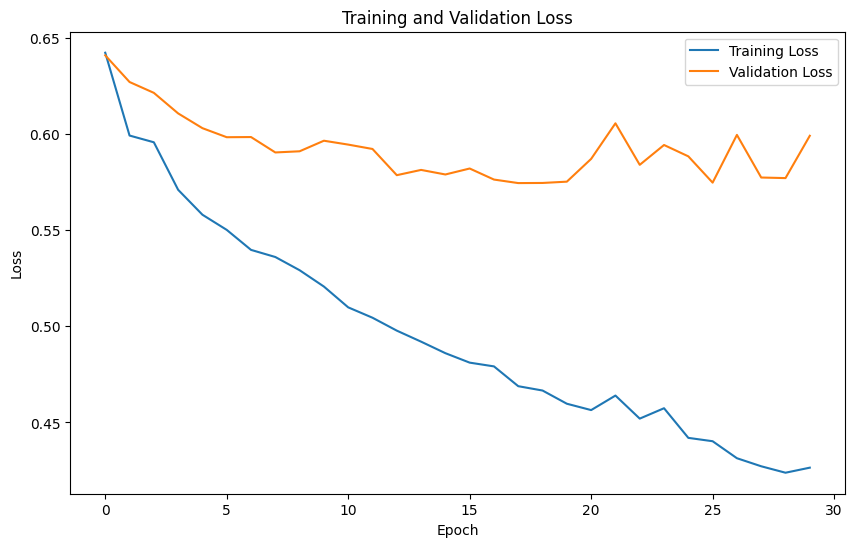

In [12]:
# Plot training and validation accuracy
# loss = [0.6456 ,0.6090 ,0.5807 ,0.5755 ,0.5489,0.5517 ,0.5340 ,0.5285 ,0.5104 ,0.5072 ]
# val_loss = [0.6264 ,0.6176 ,0.6239,0.6010,0.5973,0.5859  ,0.5776 ,0.5731,0.5710 ,0.5716  ]
plt.figure(figsize=(10, 6))
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history["val_loss"], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [20]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from kerastuner.tuners import RandomSearch, BayesianOptimization
from kerastuner import HyperParameters
# ... (load and preprocess your data here) ...

# Define a function to build the model with hyperparameters
def build_model(hp):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    for layer in base_model.layers:
        layer.trainable = False

    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(hp.Int('dense_units', min_value=32, max_value=512, step=32), activation='relu')(x)
    predictions = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

batch_sizes = [16, 32, 64, 128, 256]

# Define the search space for hyperparameters using kerastuner.HyperParameters
hyperparameters = HyperParameters()
hyperparameters.Int('dense_units', min_value=32, max_value=512, step=32)
hyperparameters.Int('epochs', min_value=10, max_value=100, step=10)
hyperparameters.Choice('batch_size', values=batch_sizes)

# Define the Keras Tuner RandomSearch
tuner = BayesianOptimization(
    build_model,
    overwrite = True,
    objective='val_accuracy',
    max_trials=15,
    directory='tuner_results',
    project_name='vgg_tuning',
    hyperparameters=hyperparameters
)




# Search for the best hyperparameters including epoch and batch size
tuner.search(rgb_train_images, train_labels, validation_data=(rgb_val_images, val_labels))

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()
# Train the best model with the full dataset
best_hyperparameters = tuner.get_best_hyperparameters()[0]
best_epochs = best_hyperparameters.get('epochs')  # Access the 'epochs' hyperparameter
best_batch_size = best_hyperparameters.get('batch_size')  # Access the 'batch_size' hyperparameter
best_dense_units = best_hyperparameters.get('dense_units')

print(best_dense_units)
print(best_epochs)
print(best_batch_size)

best_model.fit(rgb_train_images, train_labels, epochs=best_epochs,
               batch_size=best_batch_size, validation_data=(rgb_val_images, val_labels))



KeyboardInterrupt: 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [90]:
from keras import callbacks

metrics = [

    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.Accuracy(name='accuracy'),

]

# Initialize the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(5,activation='softmax'))
# Compile the model
earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                      mode="min", patience=5,
                                      restore_best_weights=True)
print(train_convolve.shape)
model.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=metrics)
history = model.fit(train_convolve, train_labels, epochs=25, batch_size=128, validation_data=(
    val_convolve, val_labels))

(1200, 32, 32, 18)
Epoch 1/25
10/10 [==============================] - ETA: 0s - loss: 110.7152 - precision: 0.3042 - recall: 0.3042 - accuracy: 0.6287

ValueError: in user code:

    File "e:\BSc Project\Jupyter Code\.venv\Lib\site-packages\keras\engine\training.py", line 1852, in test_function  *
        return step_function(self, iterator)
    File "e:\BSc Project\Jupyter Code\.venv\Lib\site-packages\keras\engine\training.py", line 1836, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "e:\BSc Project\Jupyter Code\.venv\Lib\site-packages\keras\engine\training.py", line 1824, in run_step  **
        outputs = model.test_step(data)
    File "e:\BSc Project\Jupyter Code\.venv\Lib\site-packages\keras\engine\training.py", line 1788, in test_step
        y_pred = self(x, training=False)
    File "e:\BSc Project\Jupyter Code\.venv\Lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "e:\BSc Project\Jupyter Code\.venv\Lib\site-packages\keras\engine\input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_9' (type Sequential).
    
    Input 0 of layer "dense_46" is incompatible with the layer: expected axis -1 of input shape to have value 18432, but received input with shape (None, 26624)
    
    Call arguments received by layer 'sequential_9' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 26), dtype=float32)
      • training=False
      • mask=None


In [ ]:
model.predict()

In [ ]:
# Get the accuracy data for both training and validation sets
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create the plot
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
model.summary()
num_layers_list = [2, 3, 4, 5]

# Plot the overfitting graph
plt.plot(num_layers_list, train_accuracy, label='Training Accuracy')
plt.plot(num_layers_list, val_accuracy, label='Validation Accuracy')
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
num_layers_list = [2, 3, 4, 5]

# Plot the overfitting graph
plt.plot(num_layers_list, train_loss, label='Training Loss')
plt.plot(num_layers_list, val_loss, label='Validation Loss')
plt.xlabel('Number of Layers')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Plot the overfitting graph
plt.plot(num_layers_list, train_precision, label='Training Precision')
plt.plot(num_layers_list, val_precision, label='Validation Precision')
plt.xlabel('Number of Layers')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [ ]:
train_precision = [0.44999998807907104,0.2549999952316284,0.11625000089406967,0.10249999910593033]
val_precision = [0.4350000023841858,0.11500000208616257,0.23000000417232513,0.23000000417232513]
plt.plot(num_layers_list, train_precision, label='Training Accuracy')
plt.plot(num_layers_list, val_precision, label='Validation Accuracy')
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy')
plt.legend()
plt.show()